In [1]:
import math
import random

import numpy as np
from scipy import stats
import sympy as sym
import matplotlib.pyplot as plt

In [2]:
def get_z_score(x):
    return stats.norm.ppf(x)

def get_sem(std, n):
    return std / math.sqrt(n)

def visualize_z_test(T, q, side):
    x = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 100)
    plt.figure(figsize=(8,5))
    plt.plot(x, stats.norm.pdf(x))
    
    if side == "two":
        plt.fill_between(x[x > q], 0, stats.norm.pdf(x)[x > q].flatten(), alpha=0.5, color='red')
        plt.fill_between(x[x < -q], 0, stats.norm.pdf(x)[x < -q].flatten(), alpha=0.5, color='red')
        plt.axvline(x=-T, color='r',linestyle='dashed')
        plt.text(-q - 0.5, 0.05, 'Rejection region\n(' + str(a/2) + ')', fontsize=10)
        
    elif side == "left":
        plt.fill_between(x[x < q], 0, stats.norm.pdf(x)[x < q].flatten(), alpha=0.5, color='red')

        
    elif side == "right":
        plt.fill_between(x[x > q], 0, stats.norm.pdf(x)[x > q].flatten(), alpha=0.5, color='red')
    
    plt.axvline(x=T, color='r',linestyle='dashed')
    plt.title(f"Z-Test {side} sided (T={T}, q={q})")
    
    plt.text(q + 0.5, 0.05, 'Rejection region\n(' + str(a/2) + ')', fontsize=10)
    plt.text(T + 0.1, 0.25, 'Example', fontsize=10) #for left tail
    
    plt.show()

def z_test(n, u, u0, std0, a, side="two", visualize=True):
    T = ((u - u0) / std0) * math.sqrt(n)
    
    rejected, q = None, None
    if side == "two":
        q = stats.norm.ppf(1-a/2)
        rejected = abs(T) > q
        
    elif side == "left":
        q = -stats.norm.ppf(1-a)
        rejected = T < q
        
    elif side == "right":
        q = stats.norm.ppf(1-a)
        rejected = T > q
        
    else:
        return None
    
    if visualize:
        visualize_z_test(T, q, side)
    
    return "H0: " + ("rejected" if rejected else "not rejected"), T, q
        

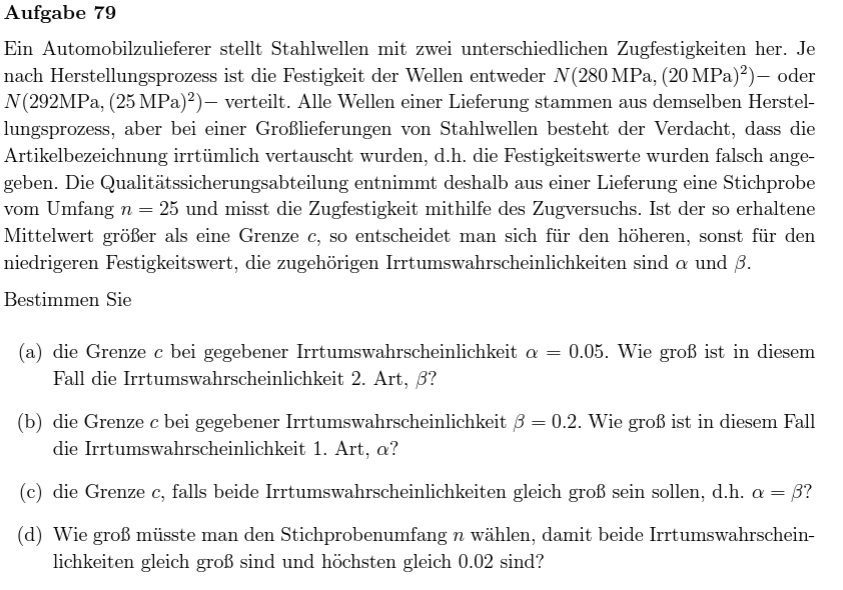

In [9]:
u1, std1 = 280, 20
u2, std2 = 292, 25

n = 25
a = .05

c = u1 + stats.norm.ppf(1-a) * get_sem(std1, n)
print(c)

round(stats.norm.cdf(c, loc=u2, scale=get_sem(std2, n)), 3) # Important to use the SEM instead of the STD

286.5794145078059


0.139

In [4]:
b = 0.2

c = u2 + stats.norm.ppf(0.2) * get_sem(std2, n)
print(c)

round(1 - stats.norm.cdf(c, loc=u1, scale=get_sem(std1, n)), 3)

287.79189383213543


0.026

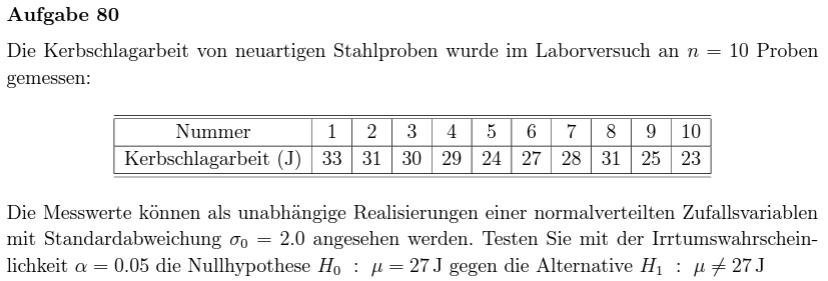

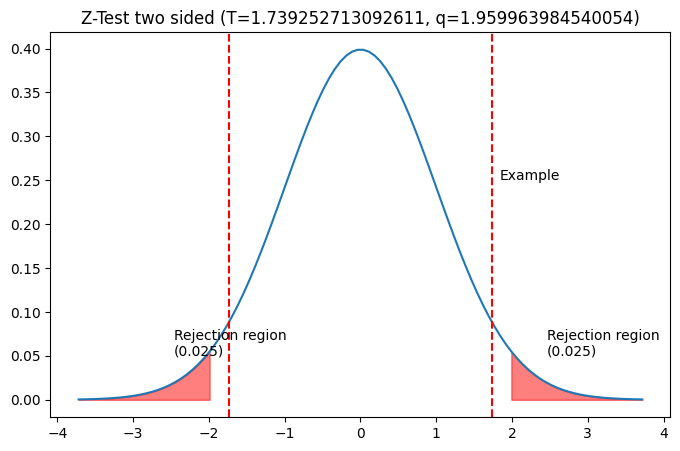

('H0: not rejected', 1.739252713092611, 1.959963984540054)

In [5]:
X = [33,31,30,29,24,27,28,31,25,23]
z_test(len(X), np.mean(X), 27, 2, .05)

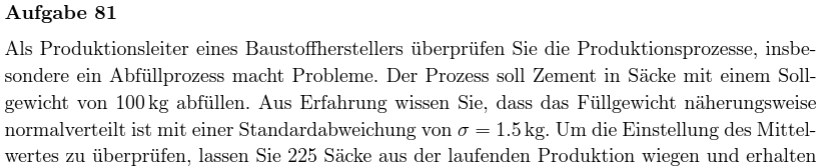
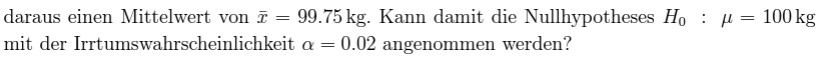

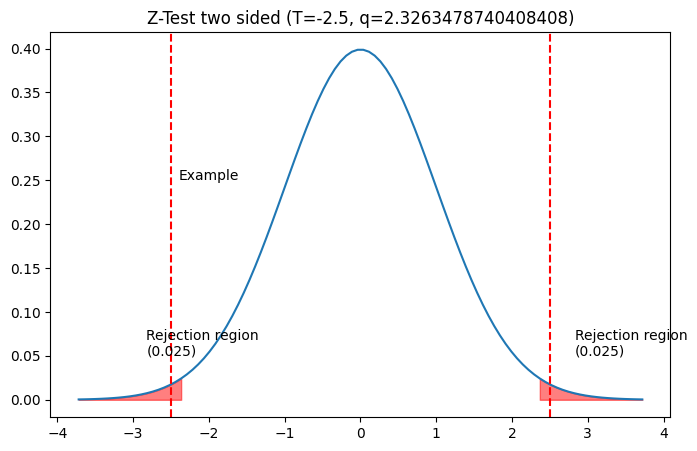

('H0: rejected', -2.5, 2.3263478740408408)

In [6]:
z_test(n=225, u=99.75, u0=100, std0=1.5, a=.02)

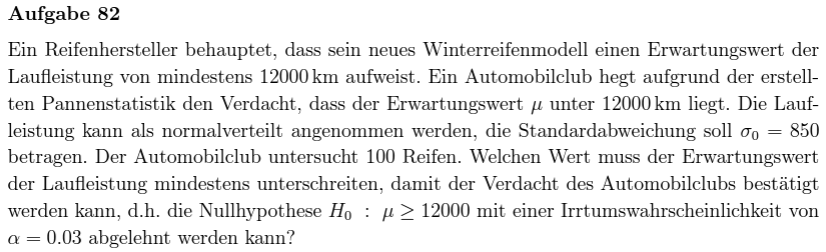

In [7]:
_, _, quantile = z_test(n=100, u=12000, u0=12000, std0=850, a=.03, side="left", visualize=False)
12000 + quantile * get_sem(850, 100)

11840.132543307143

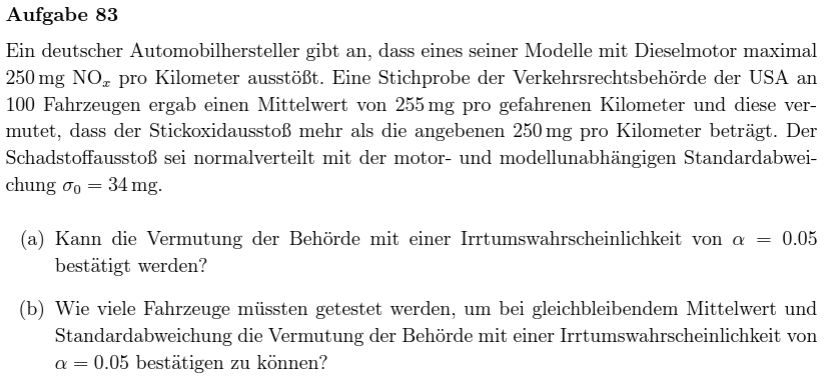

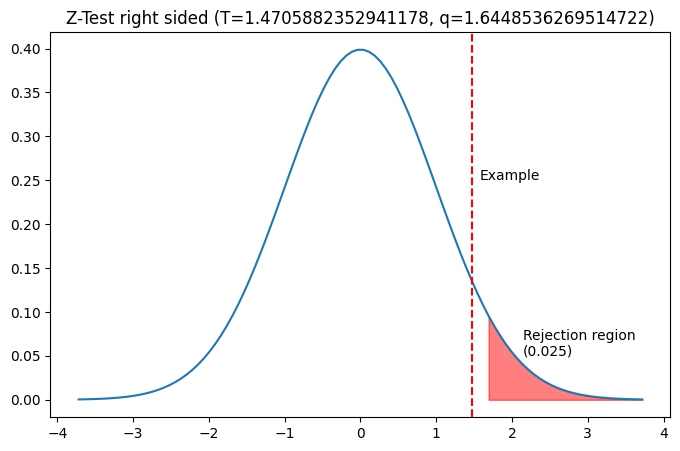

('H0: not rejected', 1.4705882352941178, 1.6448536269514722)

In [8]:
z_test(n=100, u=255, u0=250, std0=34, a=.05, side="right")